###  importing the required libraries and loading the data:

In [270]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [271]:
from subprocess import check_output
print(check_output(["ls", "/home/suyog/github/Machine_Learning_with_Python/data"]).decode("utf8")) 

1data_description.txt
1sample_submission.csv
1test.csv
1train.csv
av_hackathon_test.csv
av_hackathon_train.csv



In [272]:
#norma read_csv with any extra params thrrew utf-8 error
train = pd.read_csv('/home/suyog/github/Machine_Learning_with_Python/data/av_hackathon_train.csv', engine='python')
#train = pd.read_csv('/home/suyog/github/Machine_Learning_with_Python/data/av_hackathon_train.csv', engine='latin1')

In [273]:
train.columns

Index(['ID', 'Gender', 'City', 'Monthly_Income', 'DOB', 'Lead_Creation_Date',
       'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
       'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4', 'LoggedIn', 'Disbursed'],
      dtype='object')

In [274]:
train.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [275]:
target = 'Disbursed'
IDcol = 'ID'


## Feature Engineering


In [276]:
## get available methods
[method_name for method_name in dir(train) if callable(getattr(train, method_name))]

/home/suyog/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


['__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__div__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclass

In [277]:
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [278]:
train.describe()

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Var4,LoggedIn,Disbursed
count,8.702000e+04,8.694900e+04,86949.000000,8.694900e+04,87020.000000,5.240700e+04,52407.000000,27726.000000,27420.000000,27726.000000,87020.000000,87020.000000,87020.000000
mean,5.884997e+04,2.302507e+05,2.131399,3.696228e+03,4.961503,3.950106e+05,3.891369,19.197474,5131.150839,10999.528377,2.949805,0.029350,0.014629
std,2.177511e+06,3.542068e+05,2.014193,3.981021e+04,5.670385,3.082481e+05,1.165359,5.834213,4725.837644,7512.323050,1.697720,0.168785,0.120062
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e+04,1.000000,11.990000,200.000000,1176.410000,0.000000,0.000000,0.000000
25%,1.650000e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,2.000000e+05,3.000000,15.250000,2000.000000,6491.600000,1.000000,0.000000,0.000000
50%,2.500000e+04,1.000000e+05,2.000000,0.000000e+00,2.000000,3.000000e+05,4.000000,18.000000,4000.000000,9392.970000,3.000000,0.000000,0.000000
75%,4.000000e+04,3.000000e+05,4.000000,3.500000e+03,11.000000,5.000000e+05,5.000000,20.000000,6250.000000,12919.040000,5.000000,0.000000,0.000000
max,4.445544e+08,1.000000e+07,10.000000,1.000000e+07,18.000000,3.000000e+06,6.000000,37.000000,50000.000000,144748.280000,7.000000,1.000000,1.000000


In [279]:
train.describe(include = 'all')

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
count,87020,87020,86017,8.702000e+04,87020,87020,8.694900e+04,86949.000000,8.694900e+04,86949,...,27726.000000,27420.000000,27726.000000,87020,87020,87020,87020,87020.000000,87020.000000,87020.000000
unique,87020,2,697,NaN,11345,92,NaN,NaN,NaN,43567,...,NaN,NaN,NaN,2,2,7,30,NaN,NaN,NaN
top,ID122258G30,Male,Delhi,NaN,11-Nov-80,03-Jul-15,NaN,NaN,NaN,0,...,NaN,NaN,NaN,N,Web-browser,B,S122,NaN,NaN,NaN
freq,1,49848,12527,NaN,306,2315,NaN,NaN,NaN,4914,...,NaN,NaN,NaN,67530,64316,37280,38567,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.884997e+04,NaN,NaN,2.302507e+05,2.131399,3.696228e+03,NaN,...,19.197474,5131.150839,10999.528377,NaN,NaN,NaN,NaN,2.949805,0.029350,0.014629
std,NaN,NaN,NaN,2.177511e+06,NaN,NaN,3.542068e+05,2.014193,3.981021e+04,NaN,...,5.834213,4725.837644,7512.323050,NaN,NaN,NaN,NaN,1.697720,0.168785,0.120062
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,NaN,...,11.990000,200.000000,1176.410000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1.650000e+04,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,NaN,...,15.250000,2000.000000,6491.600000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
50%,NaN,NaN,NaN,2.500000e+04,NaN,NaN,1.000000e+05,2.000000,0.000000e+00,NaN,...,18.000000,4000.000000,9392.970000,NaN,NaN,NaN,NaN,3.000000,0.000000,0.000000
75%,NaN,NaN,NaN,4.000000e+04,NaN,NaN,3.000000e+05,4.000000,3.500000e+03,NaN,...,20.000000,6250.000000,12919.040000,NaN,NaN,NaN,NaN,5.000000,0.000000,0.000000


In [280]:
#[train[c].describe() for c in train.columns]

In [281]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

Number of variables,26
Number of observations,87020
Total Missing (%),8.9%
Total size in memory,17.3 MiB
Average record size in memory,208.0 B
Numeric,10
Categorical,12
Boolean,2
Date,0
Text (Unique),1
Rejected,1


### Dropping ID variable which is not meaningful

In [282]:
train.drop(['ID'], axis=1, inplace = True)

### 1.  'City' variable dropped because of too many categories

In [283]:
train['City'].describe()

count     86017
unique      697
top       Delhi
freq      12527
Name: City, dtype: object

In [284]:
train['City'].astype(str).describe()

count     87020
unique      698
top       Delhi
freq      12527
Name: City, dtype: object

In [285]:
train.drop(['City'], axis=1, inplace = True)

### 2. DOB converted to Age and DOB dropped

In [286]:
train['DOB'].head()

0    23-May-78
1    07-Oct-85
2    10-Oct-81
3    30-Nov-87
4    17-Feb-84
Name: DOB, dtype: object

In [287]:
from datetime import datetime as dt

In [288]:
now = pd.Timestamp(dt.now())
now

Timestamp('2018-12-31 17:06:02.847058')

In [289]:
train['DOB'] = pd.to_datetime(train['DOB'], format='%d-%b-%y')

In [290]:
train['DOB'] = train['DOB'].where(train['DOB'] < now, train['DOB'] -  np.timedelta64(100, 'Y')) 
train['age'] = (now - train['DOB']).astype('<m8[Y]') 

In [291]:
train['age'].head()

0    40.0
1    33.0
2    37.0
3    31.0
4    34.0
Name: age, dtype: float64

In [292]:
train.drop(['DOB'], axis=1, inplace = True)

### 3. EMI_Loan_Submitted_Missing created which is 1 if EMI_Loan_Submitted was missing else 0, and Original variable EMI_Loan_Submitted dropped

In [293]:
train['EMI_Loan_Submitted'].head(6)

0        NaN
1    6762.90
2        NaN
3        NaN
4        NaN
5    6978.92
Name: EMI_Loan_Submitted, dtype: float64

In [294]:
train['EMI_Loan_Submitted'].isna().sum()

59294

In [295]:
train.loc[train.EMI_Loan_Submitted.notna(), 'EMI_Loan_Submitted_Missing'] = 0
train.loc[train.EMI_Loan_Submitted.isna(), 'EMI_Loan_Submitted_Missing'] = 1
train['EMI_Loan_Submitted_Missing'].head(6)

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
5    0.0
Name: EMI_Loan_Submitted_Missing, dtype: float64

In [296]:
train.drop(['EMI_Loan_Submitted'], axis=1, inplace = True)

### 4. EmployerName dropped because of too many categories

In [297]:
train['Employer_Name'].describe()

count     86949
unique    43567
top           0
freq       4914
Name: Employer_Name, dtype: object

In [298]:
train.drop(['Employer_Name'], axis=1, inplace = True)

### 5. Existing_EMI imputed with 0 (median) since only 111 values were missing

In [299]:
train['Existing_EMI'].head(10)

0        0.0
1        0.0
2        0.0
3        0.0
4    25000.0
5    15000.0
6        0.0
7     2597.0
8        0.0
9        0.0
Name: Existing_EMI, dtype: float64

In [300]:
train['Existing_EMI'].describe()

count    8.694900e+04
mean     3.696228e+03
std      3.981021e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [301]:
train['Existing_EMI'].isna().sum()

71

In [302]:
existing_emi_array = train[train['Existing_EMI']!=np.nan]['Existing_EMI']
train['Existing_EMI'].replace(np.nan, existing_emi_array.median(), inplace = True)
#train['Existing_EMI'].fillna(train['Existing_EMI'].median())

In [303]:
train['Existing_EMI'].isna().sum()

0

### 6. Interest_Rate_Missing created which is 1 if Interest_Rate was missing else 0 | Original variable Interest_Rate dropped

In [304]:
train['Interest_Rate'].head()

0      NaN
1    13.25
2      NaN
3      NaN
4      NaN
Name: Interest_Rate, dtype: float64

In [305]:
train['Interest_Rate'].describe()

count    27726.000000
mean        19.197474
std          5.834213
min         11.990000
25%         15.250000
50%         18.000000
75%         20.000000
max         37.000000
Name: Interest_Rate, dtype: float64

In [306]:
train.loc[train.Interest_Rate.notna(), 'Interest_Rate_Missing'] = 0
train.loc[train.Interest_Rate.isna(), 'Interest_Rate_Missing'] = 1
train['Interest_Rate_Missing'].head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Interest_Rate_Missing, dtype: float64

In [307]:
train.drop(['Interest_Rate'], axis=1, inplace = True)

### 7. Lead_Creation_Date dropped because made little intuitive impact on outcome

In [308]:
train['Lead_Creation_Date'].describe()

count         87020
unique           92
top       03-Jul-15
freq           2315
Name: Lead_Creation_Date, dtype: object

In [309]:
train.drop(['Lead_Creation_Date'], axis=1, inplace = True)

### 8. Loan_Amount_Applied, Loan_Tenure_Applied imputed with median values

In [310]:
train['Loan_Amount_Applied'].isna().sum()

71

In [311]:
filtered_array = train[train['Loan_Amount_Applied']!=np.nan]['Loan_Amount_Applied']
train['Loan_Amount_Applied'].replace(np.nan, filtered_array.median(), inplace = True)

In [312]:
train['Loan_Amount_Applied'].isna().sum()

0

In [313]:
train['Loan_Tenure_Applied'].isna().sum()

71

In [314]:
filtered_array = train[train['Loan_Tenure_Applied']!=np.nan]['Loan_Amount_Applied']
train['Loan_Tenure_Applied'].replace(np.nan, filtered_array.median(), inplace = True)

In [315]:
train['Loan_Tenure_Applied'].isna().sum()

0

### 9. Loan_Amount_Submitted_Missing created which is 1 if Loan_Amount_Submitted was missing else 0 | Original variable Loan_Amount_Submitted dropped

In [316]:
train['Loan_Amount_Submitted'].head()

0         NaN
1    200000.0
2    450000.0
3    920000.0
4    500000.0
Name: Loan_Amount_Submitted, dtype: float64

In [317]:
train.loc[train.Loan_Amount_Submitted.notna(), 'Loan_Amount_Submitted_Missing'] = 0
train.loc[train.Loan_Amount_Submitted.isna(), 'Loan_Amount_Submitted_Missing'] = 1
train.drop(['Loan_Amount_Submitted'], axis=1, inplace = True)

In [318]:
train['Loan_Amount_Submitted_Missing'].head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Loan_Amount_Submitted_Missing, dtype: float64

### 10. Loan_Tenure_Submitted_Missing created which is 1 if Loan_Tenure_Submitted was missing else 0 | Original variable Loan_Tenure_Submitted droppe

In [319]:
train['Loan_Tenure_Submitted'].head()

0    NaN
1    2.0
2    4.0
3    5.0
4    2.0
Name: Loan_Tenure_Submitted, dtype: float64

In [320]:
train.loc[train.Loan_Tenure_Submitted.notna(), 'Loan_Tenure_Submitted_Missing'] = 0
train.loc[train.Loan_Tenure_Submitted.isna(), 'Loan_Tenure_Submitted_Missing'] = 1
train.drop(['Loan_Tenure_Submitted'], axis=1, inplace = True)

In [321]:
train['Loan_Tenure_Submitted_Missing'].head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Loan_Tenure_Submitted_Missing, dtype: float64

### 11. LoggedIn, Salary_Account droppe

In [322]:
train.drop(['LoggedIn'], axis=1, inplace = True)

In [323]:
train.drop(['Salary_Account'], axis=1, inplace=True)

In [324]:
train.columns

Index(['Gender', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Mobile_Verified', 'Var5',
       'Var1', 'Processing_Fee', 'Filled_Form', 'Device_Type', 'Var2',
       'Source', 'Var4', 'Disbursed', 'age', 'EMI_Loan_Submitted_Missing',
       'Interest_Rate_Missing', 'Loan_Amount_Submitted_Missing',
       'Loan_Tenure_Submitted_Missing'],
      dtype='object')

### 12. Processing_Fee_Missing created which is 1 if Processing_Fee was missing else 0 | Original variable Processing_Fee dropped

In [325]:
train['Processing_Fee'].isna().sum()

59600

In [326]:
train.loc[train.Processing_Fee.notna(), 'Processing_Fee_Missing'] = 0
train.loc[train.Processing_Fee.isna(), 'Processing_Fee_Missing'] = 1
train.drop(['Processing_Fee'], axis=1, inplace = True)

In [327]:
train['Processing_Fee_Missing'].isna().sum()

0

### 13. Source – top 2 kept as is and all others combined into different category

In [328]:
train['Source'].describe()

count     87020
unique       30
top        S122
freq      38567
Name: Source, dtype: object

In [329]:
train['Source'].value_counts().head()

S122    38567
S133    29885
S159     5599
S143     4332
S127     1931
Name: Source, dtype: int64

In [330]:
#train['Source'].isin(['S122', 'S133']).sum()
#train['Source'][~train['Source'].isin(['S122', 'S133'])].shape
train['Source'][~train['Source'].isin(['S122', 'S133'])] = 'other'


/home/suyog/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [331]:
train['Source'].value_counts()

S122     38567
S133     29885
other    18568
Name: Source, dtype: int64

### 14. Numerical and One-Hot-Coding performed

In [332]:
train.dtypes

Gender                            object
Monthly_Income                     int64
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Existing_EMI                     float64
Mobile_Verified                   object
Var5                               int64
Var1                              object
Filled_Form                       object
Device_Type                       object
Var2                              object
Source                            object
Var4                               int64
Disbursed                          int64
age                              float64
EMI_Loan_Submitted_Missing       float64
Interest_Rate_Missing            float64
Loan_Amount_Submitted_Missing    float64
Loan_Tenure_Submitted_Missing    float64
Processing_Fee_Missing           float64
dtype: object

In [333]:
# Import libraries and download example data
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [334]:
train.select_dtypes(include=['float64','int64']).columns
#train.select_dtypes(exclude=['object']).head()

Index(['Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied',
       'Existing_EMI', 'Var5', 'Var4', 'Disbursed', 'age',
       'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing'],
      dtype='object')

In [335]:
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Mobile_Verified', 'Var1', 'Filled_Form', 'Device_Type',
       'Var2', 'Source'],
      dtype='object')

In [336]:
#limited levels, so ohe won't generate large no. of feature

In [337]:
train.select_dtypes(include=['object']).describe()

,Gender,Mobile_Verified,Var1,Filled_Form,Device_Type,Var2,Source
count,87020,87020,87020,87020,87020,87020,87020
unique,2,2,19,2,2,7,3
top,Male,Y,HBXX,N,Web-browser,B,S122
freq,49848,56481,59294,67530,64316,37280,38567


In [338]:
#### Define which columns should be encoded vs scaled
columns_to_scale  = train.select_dtypes(include=['float64','int64'])
columns_to_encode = train.select_dtypes(include=['object'])

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

In [339]:
type(columns_to_scale)

pandas.core.frame.DataFrame

In [340]:
type(train['Gender'])

pandas.core.series.Series

In [341]:
# scaling
#scaled_data = pd.DataFrame(scaler.fit_transform(train[['Monthly_Income', 'Loan_Amount_Applied']]))
numeric_features = train.loc[:,['Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI', 'Var5', 
    'Var4', 'age', 'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing', 'Loan_Amount_Submitted_Missing', 
    'Loan_Tenure_Submitted_Missing', 'Processing_Fee_Missing']]

numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

numeric_features_standardized.head()

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Var4,age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing
0,-0.017841,0.197287,-0.027571,-0.092808,-0.874985,-1.148484,0.861170,0.683810,0.683810,1.230474,1.230474,0.678279
1,-0.010953,-0.085134,-0.028622,-0.092808,1.417628,0.029566,-0.125328,-1.462377,-1.462377,-0.812685,-0.812685,0.678279
2,-0.016693,1.044549,-0.027921,-0.092808,-0.874985,-1.148484,0.438385,0.683810,0.683810,-0.812685,-0.812685,0.678279
3,-0.010953,2.174231,-0.027571,-0.092808,0.888563,0.029566,-0.407184,0.683810,0.683810,-0.812685,-0.812685,0.678279
4,0.018898,0.762128,-0.028622,0.535426,2.123048,0.029566,0.015601,0.683810,0.683810,-0.812685,-0.812685,0.678279


In [342]:
# ### One Hot Encoding with Pandas   
# train['Gender'] = pd.Categorical(train['Gender'])
# dfDummies = pd.get_dummies(train['Gender'], prefix = 'category')
# df = pd.concat([train, dfDummies], axis=1)
# df.head()

In [343]:
### mass One Hot Encoding with Pandas
ohe_encoded_data = pd.get_dummies(columns_to_encode)
type(ohe_encoded_data)

pandas.core.frame.DataFrame

In [344]:
ohe_encoded_data.sample(5)

,Gender_Female,Gender_Male,Mobile_Verified_N,Mobile_Verified_Y,Var1_HAVC,Var1_HAXA,Var1_HAXB,Var1_HAXC,Var1_HAXF,Var1_HAXM,...,Var2_A,Var2_B,Var2_C,Var2_D,Var2_E,Var2_F,Var2_G,Source_S122,Source_S133,Source_other
47086,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
31057,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7224,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
10537,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
62887,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [345]:
numeric_features_standardized.columns

Index(['Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied',
       'Existing_EMI', 'Var5', 'Var4', 'age', 'EMI_Loan_Submitted_Missing',
       'Interest_Rate_Missing', 'Loan_Amount_Submitted_Missing',
       'Loan_Tenure_Submitted_Missing', 'Processing_Fee_Missing'],
      dtype='object')

In [346]:
train = pd.concat([ohe_encoded_data, numeric_features_standardized, train.loc[:,['Disbursed']]], axis=1)
train.head()

,Gender_Female,Gender_Male,Mobile_Verified_N,Mobile_Verified_Y,Var1_HAVC,Var1_HAXA,Var1_HAXB,Var1_HAXC,Var1_HAXF,Var1_HAXM,...,Existing_EMI,Var5,Var4,age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing,Disbursed
0,1,0,1,0,0,0,0,0,0,0,...,-0.092808,-0.874985,-1.148484,0.861170,0.683810,0.683810,1.230474,1.230474,0.678279,0
1,0,1,0,1,0,0,0,0,0,0,...,-0.092808,1.417628,0.029566,-0.125328,-1.462377,-1.462377,-0.812685,-0.812685,0.678279,0
2,0,1,0,1,0,0,0,0,0,0,...,-0.092808,-0.874985,-1.148484,0.438385,0.683810,0.683810,-0.812685,-0.812685,0.678279,0
3,0,1,0,1,0,0,0,0,0,0,...,-0.092808,0.888563,0.029566,-0.407184,0.683810,0.683810,-0.812685,-0.812685,0.678279,0
4,0,1,0,1,0,0,0,0,0,0,...,0.535426,2.123048,0.029566,0.015601,0.683810,0.683810,-0.812685,-0.812685,0.678279,0


In [347]:
train[target] = train[target].astype('category')
train[target].describe()

count     87020
unique        2
top           0
freq      85747
Name: Disbursed, dtype: int64

In [348]:
# mass encoding with scikit learn

###  lets define a function which will help us create GBM models and perform cross-validation.

In [349]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

### creating a baseline model 
In this case, the evaluation metric is AUC so using any constant value will give 0.5 as result. Typically, a good baseline can be a GBM model with default parameters, i.e. without any tuning


Model Report
Accuracy : 0.9856
AUC Score (Train): 0.861517
CV Score : Mean - 0.8315029 | Std - 0.009909451 | Min - 0.8185219 | Max - 0.8447856


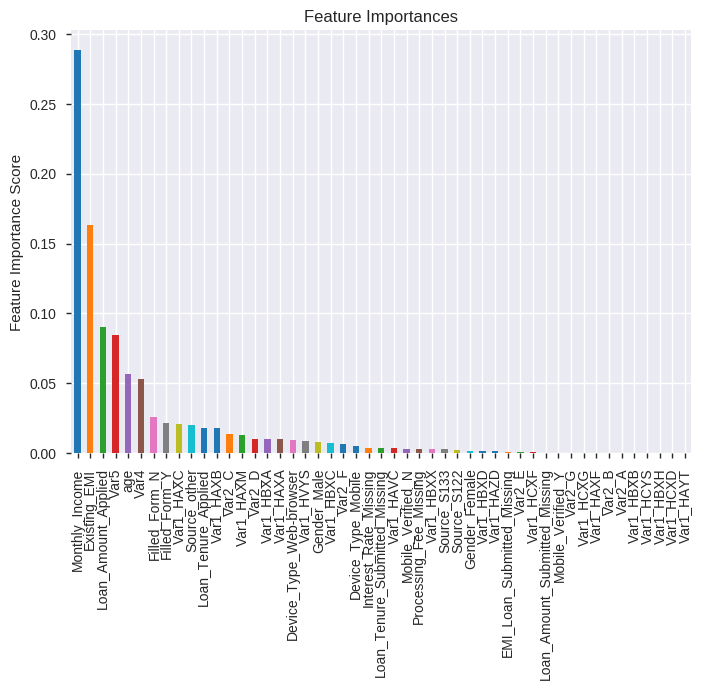

In [350]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)

So, the mean CV score is 0.8319 and we should expect our model to do better than this.

## Parameter Tuning

min_samples_split = 500  
min_samples_leaf = 50  
max_depth = 8  
max_features = ‘sqrt’  
subsample = 0.8    
Please note that all the above are just initial estimates and will be tuned later. Lets take the default learning rate of 0.1 here and check the optimum number of trees for that. For this purpose, we can do a grid search and test out values from 20 to 80 in steps of 10.

#### n_estimators

In [ ]:
# Use range. 

# In Python 2.x it returns a list so all you need is,
# >>> range(11, 17)
# [11, 12, 13, 14, 15, 16]

# In Python 3.x it's a iterator so you need to convert it to a list,
# >>> list(range(11, 17))
# [11, 12, 13, 14, 15, 16]

# Note: Second number is exclusive so here it needs to be 16+1 = 17

# EDIT:

# To response to the question about incrementing by 0.5 the easiest option would probably be to use numpy's arange,

# >>> numpy.arange(11, 17, 0.5)
# array([ 11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,  14.5,  15. ,
#         15.5,  16. ,  16.5])

In [354]:
#Choose all predictors except target & IDcols 'min_samples_split':[2,4,6,8,10,20,40,60,100]
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {'n_estimators':list(range(20,81,10))}
#param_test1 = {'n_estimators': [20,30,40,50,60,70,80]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [357]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.83215, std: 0.00996, params: {'n_estimators': 20},
  mean: 0.83525, std: 0.00950, params: {'n_estimators': 30},
  mean: 0.83630, std: 0.01012, params: {'n_estimators': 40},
  mean: 0.83614, std: 0.01040, params: {'n_estimators': 50},
  mean: 0.83650, std: 0.01011, params: {'n_estimators': 60},
  mean: 0.83646, std: 0.01118, params: {'n_estimators': 70},
  mean: 0.83634, std: 0.01077, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.8364956685400905)

### Tuning tree-specific parameters

#### max_depth and min_samples_split

In [356]:
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(200,1001,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.83573, std: 0.01187, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.83552, std: 0.00999, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.83578, std: 0.00882, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.83343, std: 0.01164, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.83078, std: 0.01268, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.83133, std: 0.01108, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.83770, std: 0.00939, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: 0.83454, std: 0.00845, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.83655, std: 0.00918, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: 0.83574, std: 0.00934, params: {'min_samples_split': 1000, 'max_depth': 7},
  mean: 0.83418, std: 0.00859, params: {'min_samples_split': 200, 'max_depth': 9},
  mean: 0.83561, std: 0.00791, params: {'min_samples_split': 400, 'max_depth': 9},
  

Note that, 1000 is an extreme value which we tested. There is a fare chance that the optimum value lies above that. So we should check for some higher values as well

#### min_samples_split and min_samples_leaf

In [359]:
param_test3 = {'min_samples_split':list(range(1000,2100,200)), 'min_samples_leaf':list(range(30,71,10))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.83855, std: 0.01113, params: {'min_samples_split': 1000, 'min_samples_leaf': 30},
  mean: 0.83740, std: 0.01099, params: {'min_samples_split': 1200, 'min_samples_leaf': 30},
  mean: 0.83888, std: 0.00842, params: {'min_samples_split': 1400, 'min_samples_leaf': 30},
  mean: 0.83965, std: 0.01106, params: {'min_samples_split': 1600, 'min_samples_leaf': 30},
  mean: 0.83794, std: 0.00884, params: {'min_samples_split': 1800, 'min_samples_leaf': 30},
  mean: 0.83810, std: 0.00887, params: {'min_samples_split': 2000, 'min_samples_leaf': 30},
  mean: 0.83759, std: 0.00985, params: {'min_samples_split': 1000, 'min_samples_leaf': 40},
  mean: 0.83920, std: 0.01214, params: {'min_samples_split': 1200, 'min_samples_leaf': 40},
  mean: 0.83764, std: 0.01007, params: {'min_samples_split': 1400, 'min_samples_leaf': 40},
  mean: 0.83924, std: 0.01001, params: {'min_samples_split': 1600, 'min_samples_leaf': 40},
  mean: 0.83796, std: 0.00995, params: {'min_samples_split': 1800, 'min_samples_

Here we get the optimum values as 1400 for min_samples_split and 60 for min_samples_leaf. Also, we can see the CV score increasing to 0.8396 now. Let’s fit the model again on this and have a look at the feature importance.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.892128
CV Score : Mean - 0.8397756 | Std - 0.01129168 | Min - 0.8241367 | Max - 0.85493


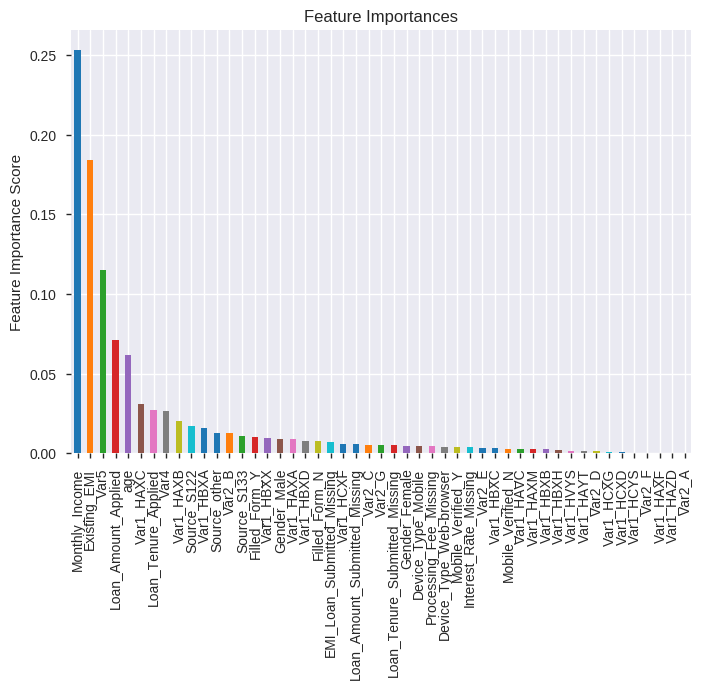

In [362]:
modelfit(gsearch3.best_estimator_, train, predictors)

#### max_features

In [363]:
param_test4 = {'max_features':list(range(7,20,2))}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, min_samples_split=1400, min_samples_leaf=60, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.83978, std: 0.01129, params: {'max_features': 7},
  mean: 0.83740, std: 0.01089, params: {'max_features': 9},
  mean: 0.83778, std: 0.00906, params: {'max_features': 11},
  mean: 0.83535, std: 0.01125, params: {'max_features': 13},
  mean: 0.83784, std: 0.01138, params: {'max_features': 15},
  mean: 0.83459, std: 0.01063, params: {'max_features': 17},
  mean: 0.83531, std: 0.00986, params: {'max_features': 19}],
 {'max_features': 7},
 0.839775591730624)

### Tuning subsample and making models with lower learning rate

In [364]:
train1.columns

Index(['ID', 'Gender', 'City', 'Monthly_Income', 'DOB', 'Lead_Creation_Date',
       'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
       'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4', 'LoggedIn', 'Disbursed'],
      dtype='object')